In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import math

Using TensorFlow backend.


In [2]:
height = 64
width = 128
channel = 3

In [3]:
clean_data_path = 'D:\\intern\\classified_data\\clean_data\\extra_clean'
noisy_15dB_path = 'D:\\intern\\classified_data\\noisy_data\\15dB\\extra_15dB'
noisy_20dB_path = 'D:\\intern\\classified_data\\noisy_data\\20dB\\extra_20dB'
noisy_25dB_path = 'D:\\intern\\classified_data\\noisy_data\\25dB\\extra_25dB'
noisy_30dB_path = 'D:\\intern\\classified_data\\noisy_data\\30dB\\extra_30dB'
noisy_100dB_path = 'D:\\intern\\classified_data\\noisy_data\\100dB\\extra_100dB'

In [4]:
clean_data_files = os.listdir(clean_data_path)
noisy_15dB_files = os.listdir(noisy_15dB_path)
noisy_20dB_files = os.listdir(noisy_20dB_path)
noisy_25dB_files = os.listdir(noisy_25dB_path)
noisy_30dB_files = os.listdir(noisy_30dB_path)
noisy_100dB_files = os.listdir(noisy_100dB_path)

In [5]:
clean_data = np.zeros((len(clean_data_files), height, width, channel), dtype=np.float32)
noisy_15dB = np.zeros((len(noisy_15dB_files), height, width, channel), dtype=np.float32)
noisy_20dB = np.zeros((len(noisy_20dB_files), height, width, channel), dtype=np.float32)
noisy_25dB = np.zeros((len(noisy_25dB_files), height, width, channel), dtype=np.float32)
noisy_30dB = np.zeros((len(noisy_30dB_files), height, width, channel), dtype=np.float32)
noisy_100dB = np.zeros((len(noisy_100dB_files), height, width, channel), dtype=np.float32)

In [6]:
n=0
for i in tqdm(clean_data_files):
    img = cv2.imread(clean_data_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    clean_data[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:10<00:00, 45.70it/s]


In [7]:
n=0
for i in tqdm(noisy_15dB_files):
    img = cv2.imread(noisy_15dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_15dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:19<00:00, 25.20it/s]


In [8]:
n=0
for i in tqdm(noisy_20dB_files):
    img = cv2.imread(noisy_20dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_20dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:21<00:00, 23.67it/s]


In [9]:
n=0
for i in tqdm(noisy_25dB_files):
    img = cv2.imread(noisy_25dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_25dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:26<00:00, 18.97it/s]


In [10]:
n=0
for i in tqdm(noisy_30dB_files):
    img = cv2.imread(noisy_30dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_30dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:15<00:00, 32.35it/s]


In [11]:
n=0
for i in tqdm(noisy_100dB_files):
    img = cv2.imread(noisy_100dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_100dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:12<00:00, 39.56it/s]


In [12]:
clean_data.shape

(500, 64, 128, 3)

In [25]:
model = Sequential([
    
  # encoder
    Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(height,width,channel)),
    BatchNormalization(),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    
    # decoder
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(channel, (3,3), padding="same", activation="sigmoid") # sigmoid, relu    
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 128, 64)       1792      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 128, 64)       256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 128, 64)       36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 128, 64)       256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 64, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 64, 32)        18464     
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 64, 32)       

In [27]:
early_stop = EarlyStopping(
                monitor='val_loss',
                patience=10, #n of epochs with no improvement which will be stopped training
                verbose=1
            )

log_csv = CSVLogger('logs_100dB.csv',
                   separator=',',
                   append=False
                   )

tensorboard = TensorBoard(
                log_dir='logs_100dB'
            )

# callbacks_list = [early_stop, log_csv, tensorboard]

In [28]:
model.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['accuracy'])

In [29]:
history = model.fit(noisy_100dB, clean_data,
          validation_split=0.1,
          batch_size=8,
          epochs=100,
          #callbacks=callbacks_list
        )

Train on 450 samples, validate on 50 samples
Epoch 1/100
450/450 [==============================] - 67s 149ms/sample - loss: 0.0322 - accuracy: 0.1413 - val_loss: 0.0392 - val_accuracy: 0.0519
Epoch 2/100
450/450 [==============================] - 61s 135ms/sample - loss: 0.0202 - accuracy: 0.2514 - val_loss: 0.0360 - val_accuracy: 0.1859
Epoch 3/100
450/450 [==============================] - 62s 138ms/sample - loss: 0.0157 - accuracy: 0.3376 - val_loss: 0.0348 - val_accuracy: 0.1618
Epoch 4/100
450/450 [==============================] - 62s 138ms/sample - loss: 0.0141 - accuracy: 0.3345 - val_loss: 0.0360 - val_accuracy: 0.1337
Epoch 5/100
450/450 [==============================] - 64s 143ms/sample - loss: 0.0135 - accuracy: 0.3354 - val_loss: 0.0312 - val_accuracy: 0.2612
Epoch 6/100
450/450 [==============================] - 62s 138ms/sample - loss: 0.0127 - accuracy: 0.3474 - val_loss: 0.0273 - val_accuracy: 0.2607
Epoch 7/100
450/450 [==============================] - 63s 139ms/sa

Epoch 56/100
450/450 [==============================] - 60s 134ms/sample - loss: 0.0083 - accuracy: 0.3440 - val_loss: 0.0068 - val_accuracy: 0.2805
Epoch 57/100
450/450 [==============================] - 62s 137ms/sample - loss: 0.0082 - accuracy: 0.3377 - val_loss: 0.0066 - val_accuracy: 0.2701
Epoch 58/100
450/450 [==============================] - 61s 136ms/sample - loss: 0.0082 - accuracy: 0.3399 - val_loss: 0.0066 - val_accuracy: 0.3527
Epoch 59/100
450/450 [==============================] - 60s 134ms/sample - loss: 0.0082 - accuracy: 0.3460 - val_loss: 0.0069 - val_accuracy: 0.2782
Epoch 60/100
450/450 [==============================] - 61s 135ms/sample - loss: 0.0081 - accuracy: 0.3385 - val_loss: 0.0067 - val_accuracy: 0.4088
Epoch 61/100
450/450 [==============================] - 60s 134ms/sample - loss: 0.0082 - accuracy: 0.3329 - val_loss: 0.0068 - val_accuracy: 0.4106
Epoch 62/100
450/450 [==============================] - 61s 136ms/sample - loss: 0.0082 - accuracy: 0.3378

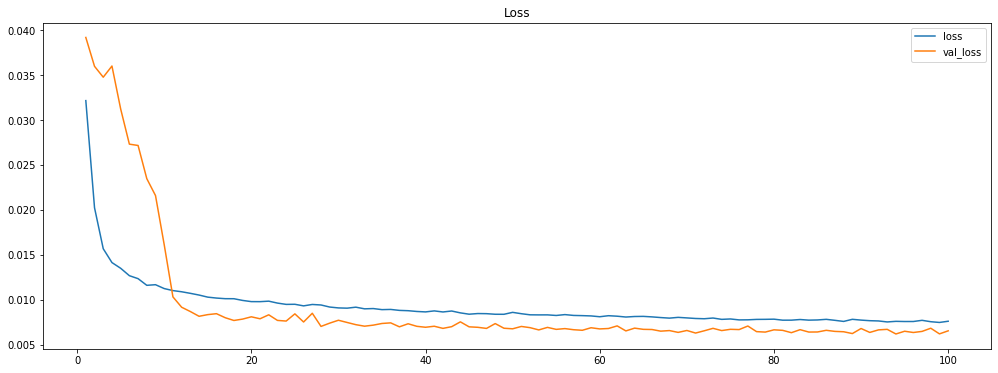

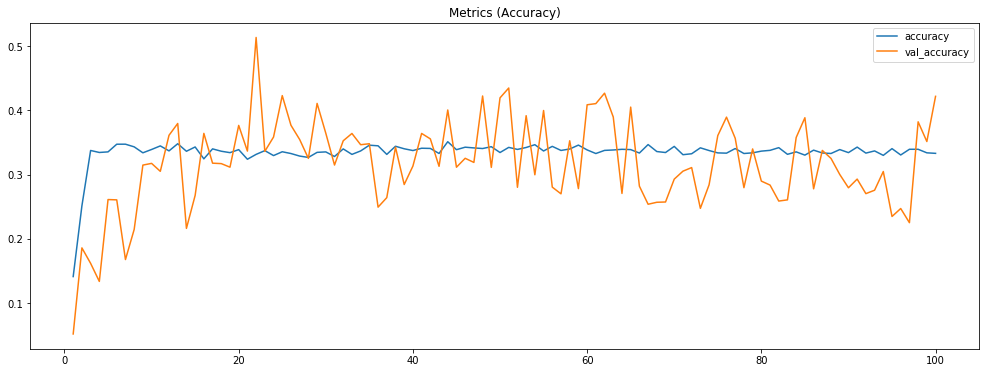

In [30]:
plt.rcParams['figure.figsize'] = (17,6)
fig, ax1 = plt.subplots()
xepochs = range(1,len(history.history['loss']) + 1)

plt.plot(xepochs, history.history['loss'], label = 'loss')
plt.plot(xepochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(xepochs, history.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [31]:
decoded_15dB = model.predict(noisy_15dB)
decoded_20dB = model.predict(noisy_20dB)
decoded_25dB = model.predict(noisy_25dB)
decoded_30dB = model.predict(noisy_30dB)

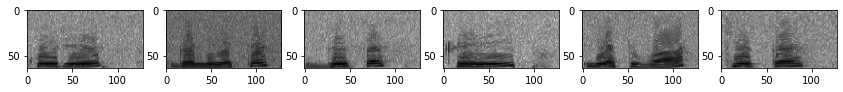

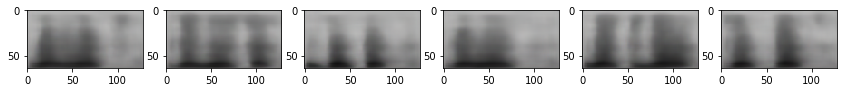

In [32]:
# Displaying prediction images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(noisy_20dB[i])
plt.show()

# Displaying prediction_train images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(decoded_20dB[i])
plt.show()

In [33]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse)) 
    return psnr

In [34]:
print(f'15dB PSNR mean: {PSNR(noisy_15dB, decoded_15dB)}')

for i in range(len(noisy_15dB)):
    
    value = PSNR(noisy_15dB[i], decoded_15dB[i]) 
    print(f"PSNR value is {value} dB")

15dB PSNR mean: 66.43108674847159
PSNR value is 65.53731197706617 dB
PSNR value is 65.7405401623769 dB
PSNR value is 66.52394002431531 dB
PSNR value is 66.42979314544901 dB
PSNR value is 66.92313402609498 dB
PSNR value is 65.811397796026 dB
PSNR value is 67.40576826535755 dB
PSNR value is 66.91352749227656 dB
PSNR value is 67.93797131078398 dB
PSNR value is 67.12763490797555 dB
PSNR value is 67.32465650748618 dB
PSNR value is 67.11546826183027 dB
PSNR value is 66.03672857027138 dB
PSNR value is 67.37320908688065 dB
PSNR value is 65.41723480565875 dB
PSNR value is 67.09743340089568 dB
PSNR value is 67.0880402488067 dB
PSNR value is 66.82684357377056 dB
PSNR value is 65.75200227932325 dB
PSNR value is 65.82267927309728 dB
PSNR value is 66.72364689927043 dB
PSNR value is 67.22688464797731 dB
PSNR value is 67.95283363854922 dB
PSNR value is 66.22687742882773 dB
PSNR value is 67.72240754344676 dB
PSNR value is 67.0731317707997 dB
PSNR value is 66.79146972000676 dB
PSNR value is 65.652449620

PSNR value is 66.79083390169063 dB
PSNR value is 66.42948750564219 dB
PSNR value is 66.4197947443216 dB
PSNR value is 65.91144232249059 dB
PSNR value is 66.90153663507091 dB
PSNR value is 65.13205169218662 dB
PSNR value is 66.34470765598549 dB
PSNR value is 67.55445554085455 dB
PSNR value is 66.40130599146326 dB
PSNR value is 67.16192733327874 dB
PSNR value is 66.05264926271073 dB
PSNR value is 65.54330641770052 dB
PSNR value is 65.57642433511373 dB
PSNR value is 66.00816825581781 dB
PSNR value is 66.79936726621709 dB
PSNR value is 66.07972960522984 dB
PSNR value is 67.23549508765251 dB
PSNR value is 66.19207064796146 dB
PSNR value is 65.34104883933463 dB
PSNR value is 66.87239384086118 dB
PSNR value is 65.40820171605355 dB
PSNR value is 67.20176658756859 dB
PSNR value is 66.12766602895191 dB
PSNR value is 67.11424994912421 dB
PSNR value is 65.31939999290299 dB
PSNR value is 66.80227353602484 dB
PSNR value is 65.78984336346133 dB
PSNR value is 67.03016135251657 dB
PSNR value is 65.9171

In [35]:
print(f'20dB PSNR mean: {PSNR(noisy_20dB, decoded_20dB)}')

for i in range(len(noisy_20dB)):
    
    value = PSNR(noisy_20dB[i], decoded_20dB[i]) 
    print(f"PSNR value is {value} dB")

20dB PSNR mean: 67.06762253452739
PSNR value is 67.34560853123102 dB
PSNR value is 68.12091883862252 dB
PSNR value is 65.11601202582987 dB
PSNR value is 67.61072557396544 dB
PSNR value is 68.18283594404001 dB
PSNR value is 68.22370696678512 dB
PSNR value is 67.96025086316199 dB
PSNR value is 65.72074111926499 dB
PSNR value is 66.92633521052903 dB
PSNR value is 68.19622119905239 dB
PSNR value is 66.26083981554684 dB
PSNR value is 67.64172207436924 dB
PSNR value is 67.74216074417411 dB
PSNR value is 68.2413224098729 dB
PSNR value is 65.79019916477591 dB
PSNR value is 67.04319731333928 dB
PSNR value is 67.22613974733294 dB
PSNR value is 65.90823833419344 dB
PSNR value is 68.20036291168552 dB
PSNR value is 68.10666952956811 dB
PSNR value is 67.58764134916221 dB
PSNR value is 67.65941341247935 dB
PSNR value is 68.34427572422288 dB
PSNR value is 66.5655565759884 dB
PSNR value is 68.27759907971868 dB
PSNR value is 67.15194760391297 dB
PSNR value is 67.19547448706632 dB
PSNR value is 66.296709

PSNR value is 67.99189804318905 dB
PSNR value is 66.9915716125498 dB
PSNR value is 68.0440198328076 dB
PSNR value is 67.68150121425256 dB
PSNR value is 65.19000993654637 dB
PSNR value is 68.45859749261473 dB
PSNR value is 67.46707646416738 dB
PSNR value is 66.04398489414388 dB
PSNR value is 64.22891610384853 dB
PSNR value is 67.13513652829776 dB
PSNR value is 68.91000118185272 dB
PSNR value is 66.55684366043647 dB
PSNR value is 65.66989185692123 dB
PSNR value is 68.06153529659882 dB
PSNR value is 67.29951230691684 dB
PSNR value is 67.57394803575347 dB
PSNR value is 67.36515289779761 dB
PSNR value is 66.51726458011495 dB
PSNR value is 66.82767853662293 dB
PSNR value is 68.03764774891295 dB
PSNR value is 67.17061635580579 dB
PSNR value is 67.3889640882616 dB
PSNR value is 67.10311085535744 dB
PSNR value is 64.9025937058384 dB
PSNR value is 67.55592643196049 dB
PSNR value is 67.55388885642138 dB
PSNR value is 66.24938151678558 dB
PSNR value is 67.9213308413543 dB
PSNR value is 67.01749336

In [36]:
print(f'25dB PSNR mean: {PSNR(noisy_25dB, decoded_25dB)}')

for i in range(len(noisy_25dB)):
    
    value = PSNR(noisy_25dB[i], decoded_25dB[i]) 
    print(f"PSNR value is {value} dB")

25dB PSNR mean: 67.8489309402618
PSNR value is 68.84584961091107 dB
PSNR value is 69.01092419496236 dB
PSNR value is 67.12682562584267 dB
PSNR value is 69.13863214346242 dB
PSNR value is 66.6828867758162 dB
PSNR value is 68.2123308156872 dB
PSNR value is 69.15619973699785 dB
PSNR value is 66.61179365007881 dB
PSNR value is 69.2827488744379 dB
PSNR value is 68.43713308583352 dB
PSNR value is 68.83469117588359 dB
PSNR value is 68.70224951689843 dB
PSNR value is 68.11679249620207 dB
PSNR value is 69.51336898615435 dB
PSNR value is 67.19604193909083 dB
PSNR value is 67.67521806656372 dB
PSNR value is 69.14777790953116 dB
PSNR value is 67.07137697899897 dB
PSNR value is 66.7105753375625 dB
PSNR value is 67.75749494263212 dB
PSNR value is 68.30549440398775 dB
PSNR value is 67.50303262518324 dB
PSNR value is 68.99082167147967 dB
PSNR value is 67.80171472691669 dB
PSNR value is 69.36538475837554 dB
PSNR value is 68.62128701810487 dB
PSNR value is 68.0487022420037 dB
PSNR value is 66.9922885471

PSNR value is 68.02756598043412 dB
PSNR value is 69.85696465646846 dB
PSNR value is 68.2726065729077 dB
PSNR value is 64.20348776235886 dB
PSNR value is 66.80995950432384 dB
PSNR value is 68.57069365484847 dB
PSNR value is 67.38941860864524 dB
PSNR value is 67.34768812790138 dB
PSNR value is 68.11249768291856 dB
PSNR value is 68.41729608676464 dB
PSNR value is 67.53601008607708 dB
PSNR value is 68.62118966128611 dB
PSNR value is 67.85344208912741 dB
PSNR value is 68.8098642437247 dB
PSNR value is 69.45429460029196 dB
PSNR value is 67.50011853929968 dB
PSNR value is 65.85096375198003 dB
PSNR value is 68.45040333525195 dB
PSNR value is 68.86293418138447 dB
PSNR value is 69.01835260095596 dB
PSNR value is 67.908078284413 dB
PSNR value is 67.76835212359651 dB
PSNR value is 68.54284945931006 dB
PSNR value is 66.35393264986718 dB
PSNR value is 68.42760578627048 dB
PSNR value is 68.86393581584935 dB
PSNR value is 68.2896272190199 dB
PSNR value is 68.29218796816788 dB
PSNR value is 68.67206849

In [37]:
print(f'30dB PSNR mean: {PSNR(noisy_30dB, decoded_30dB)}')

for i in range(len(noisy_30dB)):
    
    value = PSNR(noisy_30dB[i], decoded_30dB[i]) 
    print(f"PSNR value is {value} dB")

30dB PSNR mean: 68.49896832807137
PSNR value is 69.42555913201276 dB
PSNR value is 67.99769686883698 dB
PSNR value is 67.98104484911919 dB
PSNR value is 69.73725720408136 dB
PSNR value is 69.20876784622638 dB
PSNR value is 69.536328862052 dB
PSNR value is 69.37571187412559 dB
PSNR value is 66.60819159454434 dB
PSNR value is 68.93614013157142 dB
PSNR value is 68.74908581964469 dB
PSNR value is 69.22503515574616 dB
PSNR value is 68.8120056943601 dB
PSNR value is 67.21334695524406 dB
PSNR value is 69.9320660490717 dB
PSNR value is 67.84848785272825 dB
PSNR value is 67.74456688470627 dB
PSNR value is 69.1954690091066 dB
PSNR value is 68.72749159376214 dB
PSNR value is 69.02984344246809 dB
PSNR value is 69.54989678622313 dB
PSNR value is 69.12724348911867 dB
PSNR value is 68.67467020757404 dB
PSNR value is 68.79952380462144 dB
PSNR value is 67.01054423152983 dB
PSNR value is 69.9952110442202 dB
PSNR value is 69.49992311782543 dB
PSNR value is 68.729728367217 dB
PSNR value is 66.077050357426

PSNR value is 67.23181215711668 dB
PSNR value is 68.11310872339725 dB
PSNR value is 68.35775745249559 dB
PSNR value is 67.21012936005292 dB
PSNR value is 69.39975416653743 dB
PSNR value is 68.4589477577319 dB
PSNR value is 68.18194080252347 dB
PSNR value is 66.55198982350713 dB
PSNR value is 68.91753125701923 dB
PSNR value is 68.39793595191841 dB
PSNR value is 68.7540142113948 dB
PSNR value is 68.65886353052055 dB
PSNR value is 65.7429528398196 dB
PSNR value is 68.6900018555391 dB
PSNR value is 69.54161857191903 dB
PSNR value is 68.93527503963058 dB
PSNR value is 69.70169449445704 dB
PSNR value is 69.26273847420316 dB
PSNR value is 68.52358905449626 dB
PSNR value is 68.55714454737966 dB
PSNR value is 66.67890274617065 dB
PSNR value is 66.84331630006577 dB
PSNR value is 68.88580566629204 dB
PSNR value is 70.0540196617382 dB
